In [132]:
import pandas as pd

In [133]:
df = pd.read_csv("endereçoenergia_1802_CONSUMO_v3.csv",encoding="utf8")

In [134]:
qtd_init = df.shape[0]
df

ID_UNIDADE   CONSUMO          X          Y
0         8326576    201.00  -4.443865 -43.881223
1        43738208   2460.00  -4.443865 -43.881223
2           80241   2629.00 -22.781945 -43.429318
3        11208509   1517.00  -5.525634 -47.473339
4            3921  20175.44  -2.511216 -44.303882
...           ...       ...        ...        ...
22482  2000176840    100.00  -2.473820 -44.194680
22483  2000104565    100.00  -6.339354 -47.397897
22484  2000146949   7254.00  -2.526376 -45.088365
22485     1548425    100.00  -2.505339 -44.317845
22486    42222488      0.00  -5.483732 -47.473396

[22487 rows x 4 columns]

In [135]:
df = df.dropna()

<AxesSubplot:xlabel='X', ylabel='Y'>

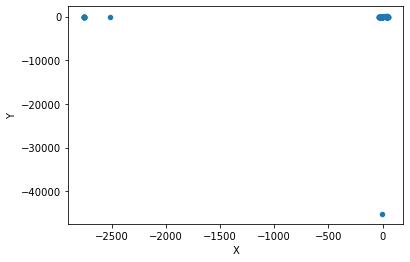

In [136]:
df.plot.scatter(x="X",y="Y")

## De modo grosseiro, considerando apenas as extremidades do maranhão:
### O range de X da maranhão é [10.26,-1.06]
### O range de Y da maranhão é [-48.74,-41.80]

In [137]:
threshold = 0.05

X_MAX= -1.06 + threshold
X_MIN = -10.26 - threshold

Y_MIN = -48.74 - threshold
Y_MAX = -41.80 + threshold

In [138]:
df_invalid = df[~((df['X']>X_MIN) & (df['X']<X_MAX) & (df['Y']>Y_MIN) & (df['Y']<Y_MAX))]
df_valid = df[((df['X']>X_MIN) & (df['X']<X_MAX) & (df['Y']>Y_MIN) & (df['Y']<Y_MAX))]

In [139]:
qtd_valid = df_valid.shape[0]
df_valid

ID_UNIDADE   CONSUMO         X          Y
0         8326576    201.00 -4.443865 -43.881223
1        43738208   2460.00 -4.443865 -43.881223
3        11208509   1517.00 -5.525634 -47.473339
4            3921  20175.44 -2.511216 -44.303882
5        38115812   1987.00 -2.511216 -44.303882
...           ...       ...       ...        ...
22482  2000176840    100.00 -2.473820 -44.194680
22483  2000104565    100.00 -6.339354 -47.397897
22484  2000146949   7254.00 -2.526376 -45.088365
22485     1548425    100.00 -2.505339 -44.317845
22486    42222488      0.00 -5.483732 -47.473396

[21770 rows x 4 columns]

In [140]:
print(f'{((qtd_valid * 100)/qtd_init):0.2f}% ({qtd_valid}/{qtd_init}) das coordenadas são válidas')

96.81% (21770/22487) das coordenadas são válidas


<AxesSubplot:xlabel='X', ylabel='Y'>

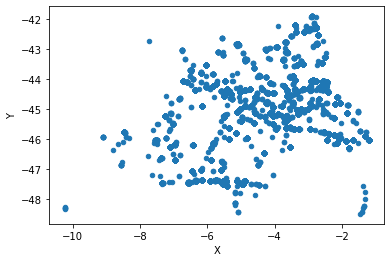

In [141]:
df_valid.plot.scatter(x="X",y="Y")

In [142]:
df_invalid

ID_UNIDADE    CONSUMO            X          Y
2           80241    2629.00   -22.781945 -43.429318
75       15841389      30.00   -22.907083 -43.181915
77       31584698      43.00    -9.975377 -67.824898
106       5984424  106979.02    39.548667  -8.979649
170       9827617    1158.00 -2759.000000 -42.823621
...           ...        ...          ...        ...
22371    42134040     623.00   -20.333137 -40.386973
22430    43662600     137.00    41.462198  15.544630
22431  2000137333      30.00    41.462198  15.544630
22461    15861843    1420.00   -21.252867 -50.645850
22462  2000003000    8938.00   -21.252867 -50.645850

[245 rows x 4 columns]

<AxesSubplot:xlabel='X', ylabel='Y'>

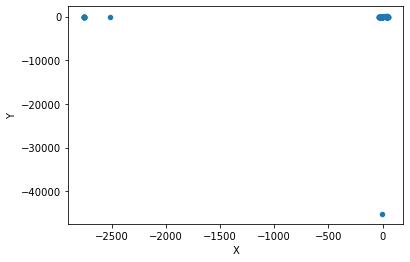

In [151]:
df_invalid.plot.scatter(x="X",y="Y")

In [152]:
df_valid.to_csv('data_cosumo.csv',index=False,encoding='utf8')

<AxesSubplot:>

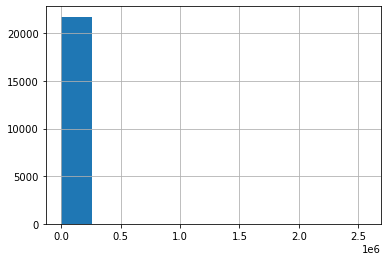

In [154]:
df_valid['CONSUMO'].hist()